<a href="https://www.kaggle.com/code/subhajeetdas/netflix-stock-price-prediction?scriptVersionId=125768436" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/netflix-stock-price-prediction/NFLX.csv


# Data Loading

In [2]:
df = pd.read_csv("/kaggle/input/netflix-stock-price-prediction/NFLX.csv")

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


# Data Preparation

In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.shape

(1009, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [8]:
train, test = train_test_split(df, test_size = 0.2)

In [9]:
test_pred = test.copy()

In [10]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
330,2019-05-30,350.549988,354.209991,348.299988,351.850006,351.850006,4008000
564,2020-05-04,417.779999,428.540009,414.869995,428.149994,428.149994,7799100
887,2021-08-13,512.640015,521.440002,511.510010,515.919983,515.919983,2176300
171,2018-10-09,348.480011,358.720001,347.089996,355.709991,355.709991,8755000
508,2020-02-12,377.179993,380.619995,375.880005,380.010010,380.010010,4624800
115,2018-07-20,364.920013,370.500000,360.140015,361.049988,361.049988,15096700
942,2021-11-01,689.059998,689.969971,676.539978,681.169983,681.169983,3110900
77,2018-05-25,349.899994,354.359985,348.829987,351.290009,351.290009,7817400
526,2020-03-10,356.429993,364.540009,347.850006,364.130005,364.130005,7604400
286,2019-03-27,361.000000,362.470001,350.369995,353.369995,353.369995,7852400


In [11]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
841,2021-06-09,494.500000,496.089996,484.649994,485.809998,485.809998,3055000
281,2019-03-20,358.910004,375.899994,357.010010,375.220001,375.220001,10917200
587,2020-06-05,407.290009,420.239990,404.250000,419.600006,419.600006,5099600
751,2021-01-29,538.000000,541.000000,530.179993,532.390015,532.390015,4325300
85,2018-06-07,368.540009,368.700012,357.799988,361.399994,361.399994,8278000
801,2021-04-13,557.000000,559.750000,550.299988,553.729980,553.729980,2720300
566,2020-05-06,429.299988,439.769989,426.390015,434.260010,434.260010,6660700
614,2020-07-15,516.299988,529.000000,510.179993,523.260010,523.260010,10066700
113,2018-07-18,381.239990,383.130005,372.359985,375.130005,375.130005,21746300
67,2018-05-11,329.649994,331.260010,324.869995,326.459991,326.459991,4589700


In [12]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [13]:
y_train = train['Close'].values
y_test = test['Close'].values

# Linear Regression

In [14]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = model_lnr.predict(x_test)

In [16]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.69348576]


# Model Evaluation

In [17]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 12.759
RMSE 3.572
R2 Score :  0.999


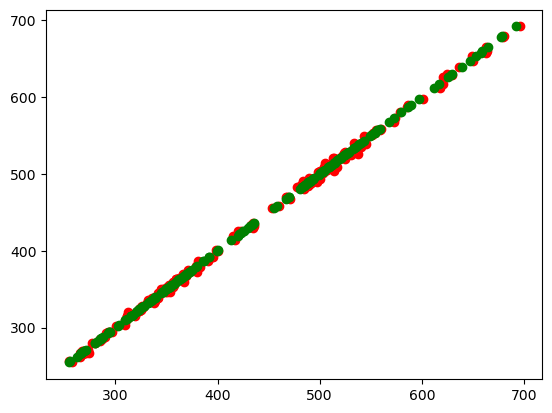

In [18]:
plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='green')

In [19]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
841,2021-06-09,494.500000,496.089996,484.649994,485.809998,485.809998,3055000,487.965610
281,2019-03-20,358.910004,375.899994,357.010010,375.220001,375.220001,10917200,371.351582
587,2020-06-05,407.290009,420.239990,404.250000,419.600006,419.600006,5099600,415.155206
751,2021-01-29,538.000000,541.000000,530.179993,532.390015,532.390015,4325300,534.378736
85,2018-06-07,368.540009,368.700012,357.799988,361.399994,361.399994,8278000,360.542534
...,...,...,...,...,...,...,...,...
185,2018-10-29,305.260010,307.890015,275.399994,284.839996,284.839996,21698800,285.034177
87,2018-06-11,361.880005,365.670013,360.910004,361.450012,361.450012,4432400,364.180341
671,2020-10-05,506.799988,520.989990,501.700012,520.650024,520.650024,4088100,513.991971
205,2018-11-27,259.239990,269.079987,256.140015,266.630005,266.630005,11149500,265.062264


<div class="flourish-embed flourish-chart" data-src="visualisation/13412598"><script src="https://public.flourish.studio/resources/embed.js"></script></div>

In [20]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,430.169059,109.371162,254.589996,338.757499,420.510010,514.609985,691.690002
Close_Prediction,202.0,430.455758,109.387724,255.126993,339.678100,418.307918,513.888685,695.764279


# Saving the Data as CSV

In [21]:
test_pred['Date'] = pd.to_datetime(test_pred['Date'],format='%Y-%m-%d')

In [22]:
output = pd.DataFrame(test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
2018-03-05,315.000000,311.055769
2018-03-06,NaN,NaN
2018-03-07,NaN,NaN
2018-03-08,317.000000,317.037584
2018-03-09,NaN,NaN
...,...,...
2022-01-29,NaN,NaN
2022-01-30,NaN,NaN
2022-01-31,NaN,NaN


In [23]:
output.to_csv('submission.csv', index=True)
print("submission successfully saved!")

submission successfully saved!


<br>
<p style="text-align:center; font-weight:800; font-size:18px"><em>Thank you! For viewing this Notebook, do upvote if you like it and please feel free to provide feedback.</em><br>
<br>    
<p style="text-align:center"><img src="https://allfreethankyounotes.com/wp-content/uploads/2021/01/all-free-thank-you-gif-3.gif" width="480" height="373"></p>